In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Data Preprocessing

In [2]:
data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

In [3]:
data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


#### CreditScore, Geography, Gender, Age, Tenure, Balance, NumProducts, HasCrCard, IsActiveMember, EstimatedSalary. These would be the important columns that might be relevent to predict the answer.

In [4]:
data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


#### Checking Distribution of "Exited" Class

<Axes: xlabel='Exited'>

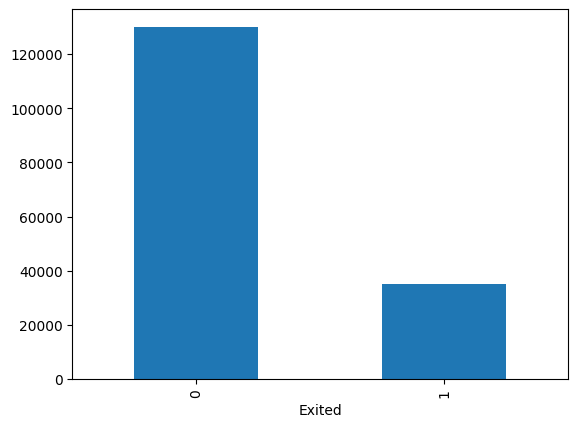

In [5]:
import matplotlib.pyplot as plt
data["Exited"].value_counts().plot(kind='bar')

#### There is a major imbalance in the data. We can fix it by OverSampling the minority class

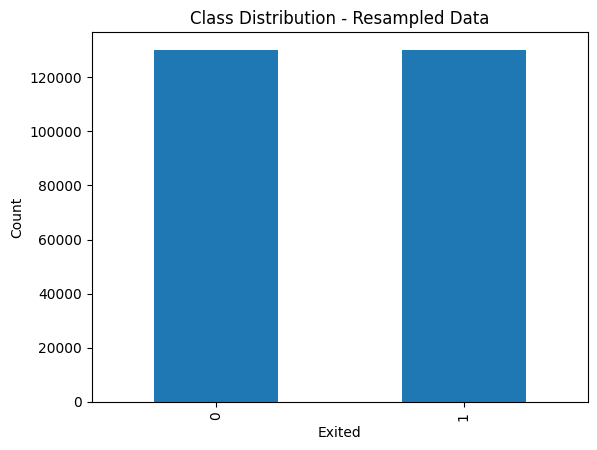

In [6]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

X = data.drop("Exited", axis=1)  # Features
y = data["Exited"]  # Target variable

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto')

# Fit and transform the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name="Exited")], axis=1)

# Plotting the bar chart for the resampled data
data["Exited"].value_counts().plot(kind='bar')

# Adding labels and title
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Class Distribution - Resampled Data')

# Display the plot
plt.show()


#### Label Encode the Gender Column, OneHotEncode the Geography Column

In [7]:
# data = data.sample(frac=0.1)
data = pd.get_dummies(data, columns=['Geography'], prefix='Geography')
columns_used = ["CreditScore", "Age", "Gender", "Geography_France", "Geography_Germany", "Geography_Spain", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["Geography_France"] = le.fit_transform(data["Geography_France"])
data["Geography_Germany"] = le.fit_transform(data["Geography_Germany"])
data["Geography_Spain"] = le.fit_transform(data["Geography_Spain"])
X = data[columns_used].copy()
y = data["Exited"].copy().to_list()

# Building the Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.ensemble import StackingClassifier

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = XGBClassifier(
    learning_rate=0.01,  
    n_estimators=500,  
    max_depth=5,  
)
model.fit(X_train, y_train)

acc = model.score(X_test, y_test)
prob = model.predict_proba(X_test)
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)

print("Score:", acc)
print("AUC:", auc)

Score: 0.8114744648964378
AUC: 0.8912345114375078


# Analyzing Performance using ConfusionMatrix

In [16]:
pred = [0 if x<=0.5 else 1 for x in prob]

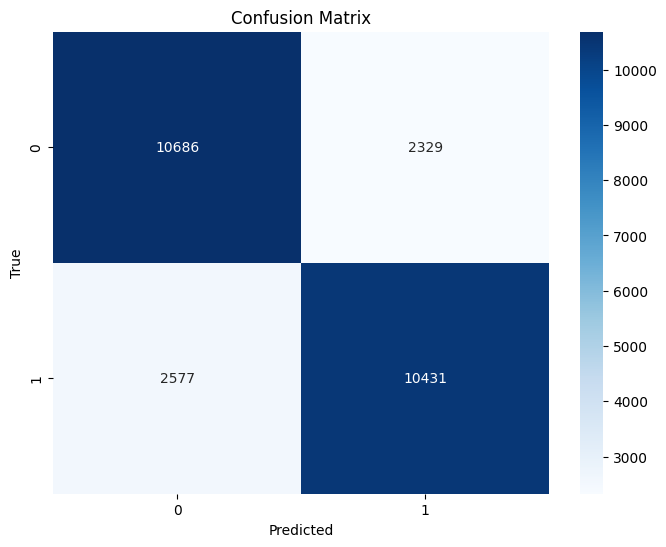

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
input_df = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
input_df = pd.get_dummies(input_df, columns=['Geography'], prefix='Geography')
le = LabelEncoder()
input_df["Gender"] = le.fit_transform(input_df["Gender"])
input_df["Geography_France"] = le.fit_transform(input_df["Geography_France"])
input_df["Geography_Germany"] = le.fit_transform(input_df["Geography_Germany"])
input_df["Geography_Spain"] = le.fit_transform(input_df["Geography_Spain"])
input_data = input_df[columns_used].copy()

In [19]:
output_data = model.predict_proba(input_data)
output_data = output_data[:, 1]

In [20]:
output_df = pd.DataFrame({
    "id": input_df["id"],
    "Exited": output_data
})
output_df.to_csv('/kaggle/working/submission.csv', index=False)